In [147]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np

import plotly.express as px


In [148]:
random_data = pd.read_csv('csv/SVM/random_data.csv')
random_data_2 = pd.read_csv('csv/SVM/random_data_2.csv')
random_data_3 = pd.read_csv('csv/SVM/random_data_3.csv')

In [149]:
random_data.head()

,feature_1,feature_2,target
0,0.811586,1.977330,1
1,-0.283428,-1.368891,0
2,-0.281272,0.858368,1
3,0.617176,1.293528,1
4,1.080526,0.815136,1


In [150]:
random_data.describe()

,feature_1,feature_2,target
count,1000.000000,1000.000000,1000.00000
mean,-0.012506,-0.021365,0.50000
std,1.195156,1.155874,0.50025
min,-3.650544,-3.187975,0.00000
25%,-1.049857,-1.032517,0.00000
50%,0.468185,0.127183,0.50000
75%,1.003231,0.963168,1.00000
max,1.992686,2.372060,1.00000


feature_1


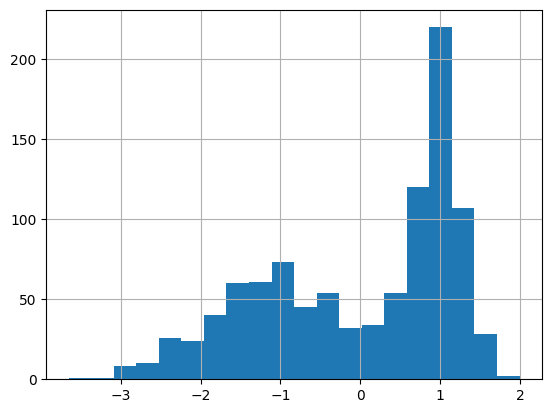

feature_2


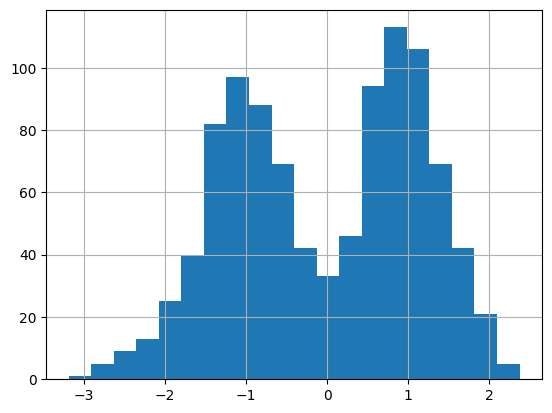

target


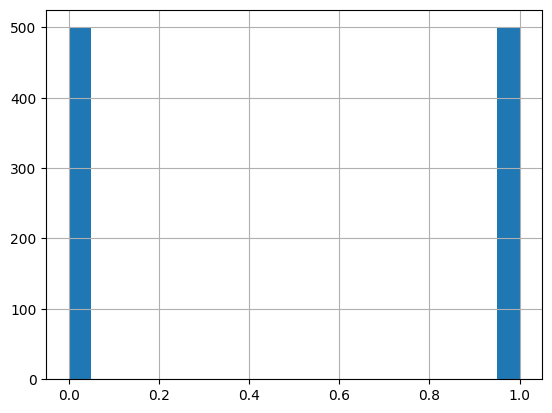

In [151]:
for c in random_data.columns:
    print(c)
    random_data[c].hist(bins=20)
    plt.show()

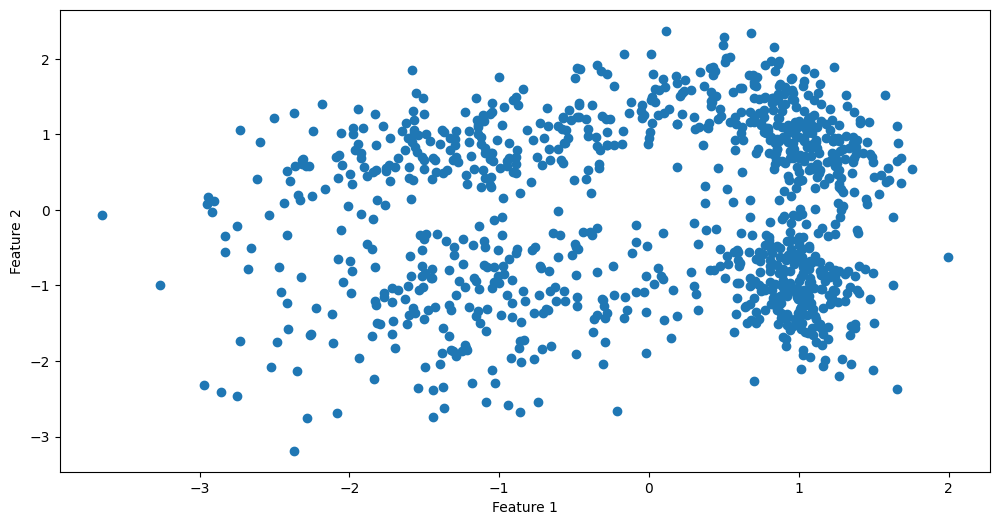

In [152]:
# Scatter plot
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(random_data['feature_1'], random_data['feature_2'])
 
# x-axis label
ax.set_xlabel('Feature 1')
 
# y-axis label
ax.set_ylabel('Feature 2')
plt.show()

In [153]:
#Dataset 1

X = np.array(random_data.drop(columns='target'))
y = np.array(random_data['target'].replace(0,-1))


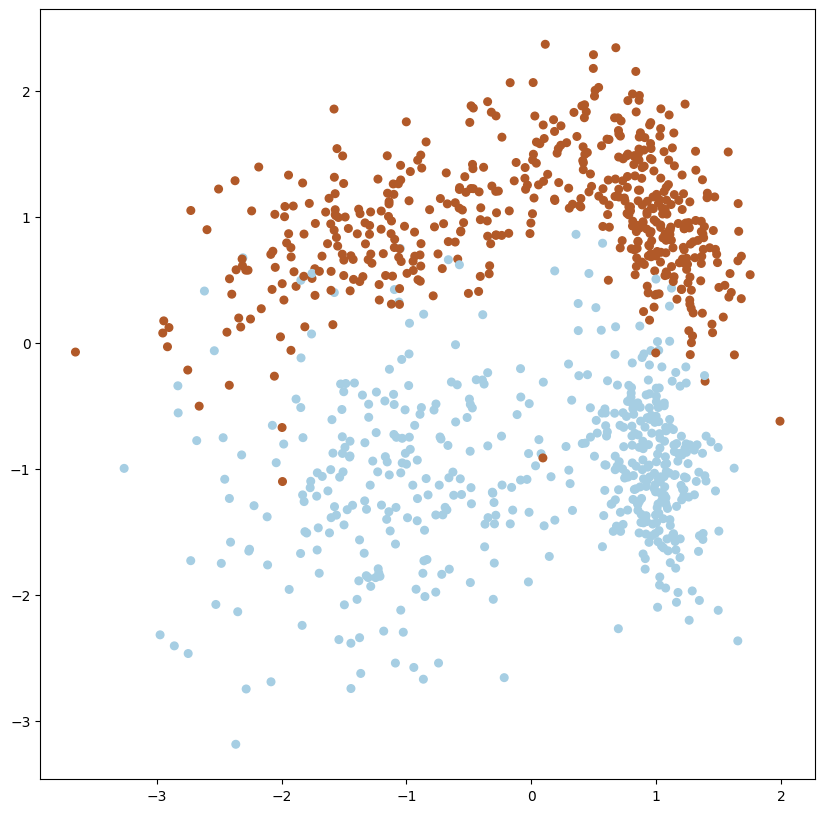

In [154]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1], c=y,s=30, cmap=plt.cm.Paired)
plt.show()


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

In [156]:
clf = SVC(kernel='linear', C=1000)
# clf = SVC(kernel='rbf',gamma=0.5, C=1000)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#Train Score
clf.score(X_train,y_train)


0.9475

In [157]:
# Test Score
accuracy_score(y_pred,y_test)

0.985

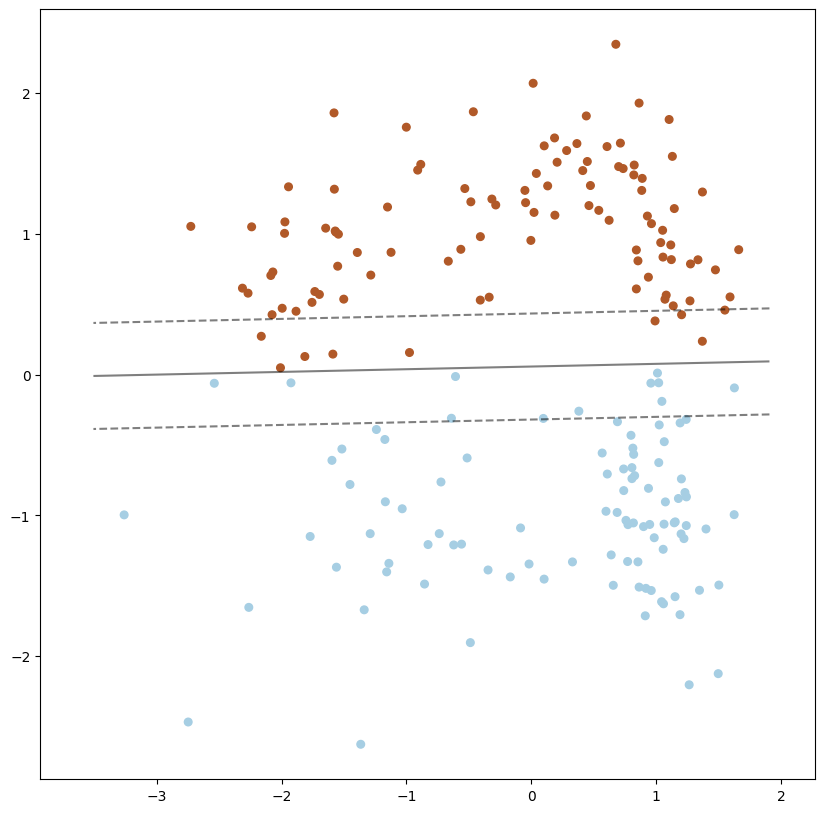

In [158]:

plt.figure(figsize=(10,10))
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred,s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY,XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX,YY,Z, colors='k', levels=[-1,0,1],alpha=0.5, linestyles=['--','-','--'])
#Plot support vectors
ax.scatter(clf.support_vectors_[:,0],
           clf.support_vectors_[:,1],s=100,
           linewidth=1,facecolors='none')
plt.show()


In [159]:
random_data_3D = pd.read_csv('csv/SVM/random_data_3d.csv')

In [160]:
random_data_3D.head()

,feature_1,feature_2,feature_3,target
0,1.126445,0.978839,-0.618271,1
1,0.312105,1.098053,-0.639979,1
2,-0.820462,-0.402507,-1.084069,0
3,-1.133805,0.688333,-1.082364,0
4,1.129562,0.267780,-1.086351,1


In [161]:
random_data_3D.describe()

,feature_1,feature_2,feature_3,target
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,-0.019750,0.050881,0.009033,0.50000
std,1.121943,0.997245,1.166339,0.50025
min,-2.458991,-2.718469,-2.374036,0.00000
25%,-1.014670,-0.661336,-1.003989,0.00000
50%,0.106374,0.060763,-0.408566,0.50000
75%,0.981751,0.712936,1.026426,1.00000
max,2.365007,2.753076,3.362534,1.00000


feature_1


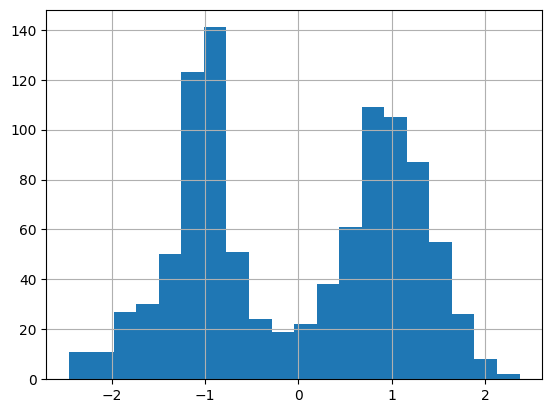

feature_2


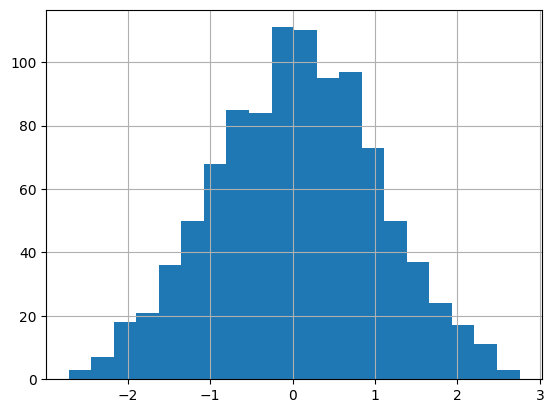

feature_3


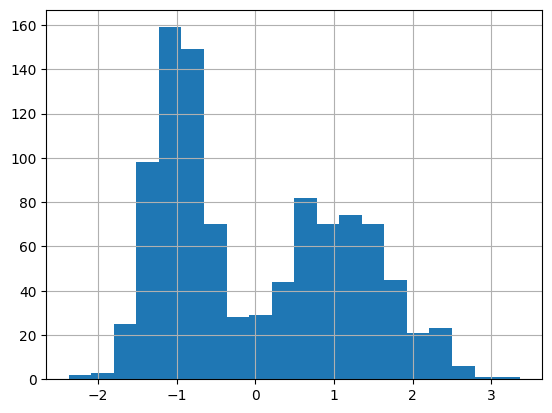

target


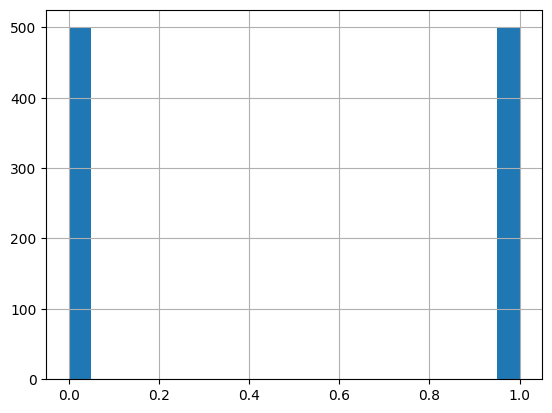

In [162]:
for c in random_data_3D.columns:
    print(c)
    random_data_3D[c].hist(bins=20)
    plt.show()


In [163]:
X = random_data_3D.drop(columns='target', axis=1)
y = random_data_3D['target']
fig = px.scatter_3d(random_data_3D, x=X["feature_1"], y=X["feature_2"], z=X["feature_3"],
              color='target')
fig.show()

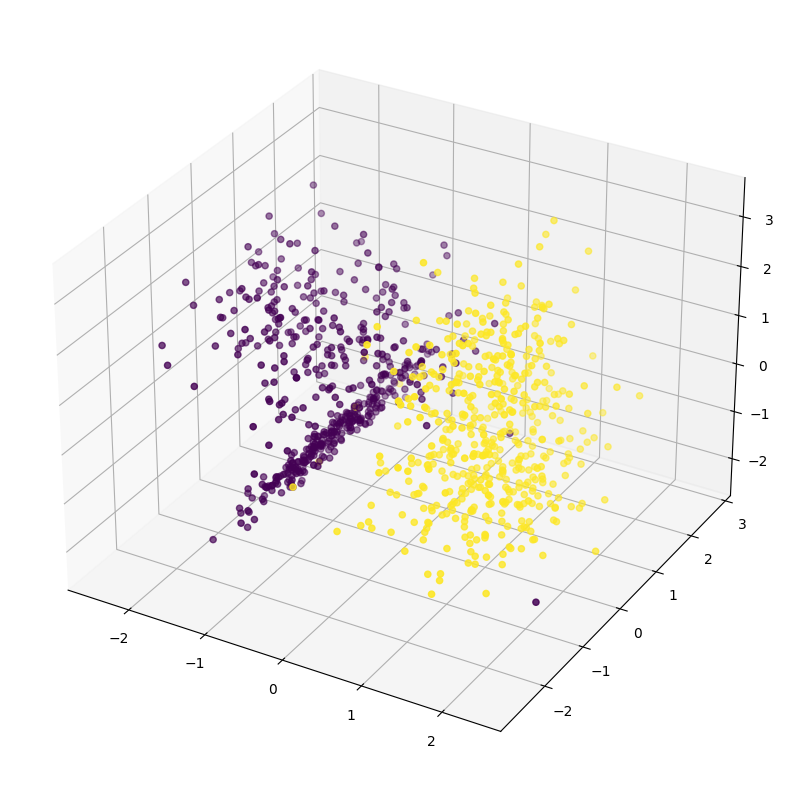

In [164]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['feature_1'], X['feature_2'], X['feature_3'], c=y)
plt.show()

In [165]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)


In [166]:
#Train Score
clf = SVC(kernel='linear', C=1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.97375

In [167]:
#Test Score
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.975

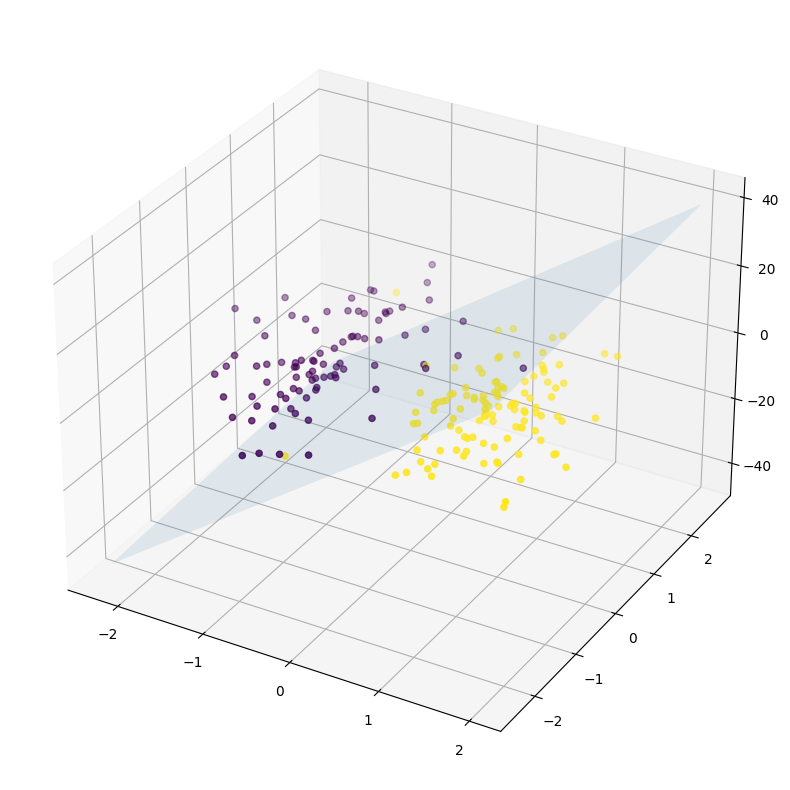

In [168]:


def plot_hyperplane(X, y, clf):

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X['feature_1'], X['feature_2'], X['feature_3'], c=y)
    w = clf.coef_[0]
    a, b, c = w[0], w[1], w[2]
    d = clf.intercept_[0]
    xx, yy = np.meshgrid(np.linspace(X['feature_1'].min(), X['feature_1'].max()), 
                         np.linspace(X['feature_2'].min(), X['feature_2'].max()))
    zz = (-a * xx - b * yy - d) / c


    ax.plot_surface(xx, yy, zz, alpha=0.1)

    plt.show()

    


plot_hyperplane(X_test, y_test, clf)